In [ ]:
!pip list

In [2]:
!conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0

^C


In [ ]:
!python -m pip install "tensorflow<2.11"

In [4]:
import tensorflow as tf

In [5]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# 1. Setup and Load Data

### 1.1 Install Dependencies and Setup

In [22]:
!pip install opencv-python

  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)


In [23]:
!pip install matplotlib

  Using cached matplotlib-3.8.2-cp310-cp310-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.0-cp310-cp310-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.47.2-cp310-cp310-win_amd64.whl.metadata (160 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.2.0-cp310-cp310-win_amd64.whl.metadata (9.9 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.8.2-cp310-cp310-win_amd64.whl (7.6 MB)
Using cached contourpy-1.2.0-cp310-cp310-win_amd64.whl (186 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.47.2-cp310-cp310-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl (56 kB)
Using cached pillow-10.2.0-cp310-cp310-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)


In [7]:
import tensorflow as tf
import os

In [31]:
import matplotlib.pyplot as plt

In [18]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [19]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [20]:
len(gpus)

1

In [21]:

##* Avoid OOM errors by setting GPU memory Consumption Growth 
gpus = tf.config.experimental.list_physical_devices("GPU")
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### 1.2 Remove dodgy images

In [24]:
import cv2
import imghdr

In [25]:
data_dir = 'data'

In [26]:
image_exts = ['jpeg','jpg','bmp','png']

In [27]:
os.listdir(data_dir)

['happy', 'sad']

In [29]:
img = cv2.imread(os.path.join('data','happy','da2011.jpg'))

In [30]:
img.shape

(696, 1000, 3)

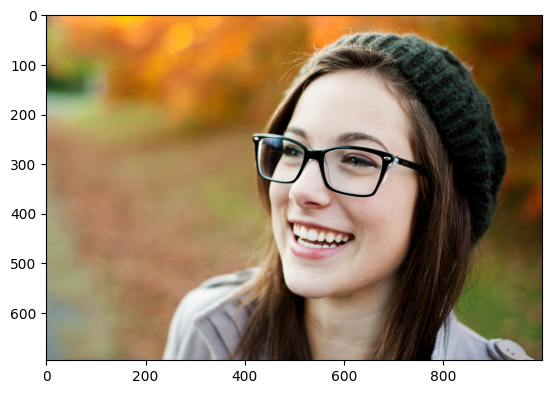

In [34]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in extension lists {}'.format(image_path))
                os.remove(image_path)
                
        except Exception as e:
            print('issue with image {}'.format(image_path))
            

image not in extension lists data\happy\105829538.jpg
image not in extension lists data\happy\105830147.jpg
image not in extension lists data\happy\10ec070e.jpg
image not in extension lists data\happy\1600px_COLOURBOX61480902.jpg
image not in extension lists data\happy\86823068.jpg
image not in extension lists data\happy\beauty-portrait-african-woman-smile-260nw-2337392867.jpg
image not in extension lists data\happy\cdd65d069adf4216b9308281674fe571.webp
image not in extension lists data\happy\depositphotos_374111884-stock-photo-cute-happy-face-close-face.jpg
image not in extension lists data\happy\EvW8xleoSq2Ss6lr3soFAA.webp
image not in extension lists data\happy\half-face-smile-black-woman-260nw-2346359619.jpg
image not in extension lists data\happy\happy-excited-face-senior-man-260nw-2333089649.jpg
image not in extension lists data\happy\smiling-portrait-face-real-man-600w-146693819.jpg
image not in extension lists data\sad\02664b2b1da54121b1e0da68aa94d5f9.webp
image not in extensio

### 1.3 Load the Image Data

In [37]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [38]:
import numpy as np 
from matplotlib import pyplot as plt

In [40]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 313 files belonging to 2 classes.


In [41]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [43]:
data_iterator = data.as_numpy_iterator()

In [59]:
batch = data_iterator.next()

In [50]:

#* This is the images 
batch[0].shape

(32, 256, 256, 3)

In [62]:
batch[1]

#* Class 0 = Happy People
#* Class 1 = Sad People 

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

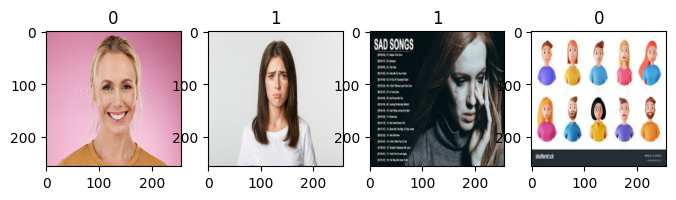

In [60]:
fig,ax = plt.subplots(ncols=4,figsize=(8,9))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [66]:
scaled = batch[0] / 255

In [69]:
scaled.max()

1.0

# 2. Preprocess Data

### 2.1 Scale Data

In [70]:
data = data.map(lambda x,y:(x/255,y))  #* x=> images , y=> Labels

In [73]:
scaled_iterator =  data.as_numpy_iterator()

In [79]:
batch = scaled_iterator.next()

In [92]:
batch[0].max()

1.0

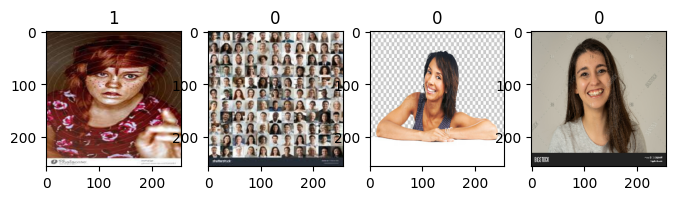

In [77]:
fig,ax = plt.subplots(ncols=4,figsize=(8,9))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2.2 Split Data

In [97]:
len(data) #* 10 batch, each of them has 32 images 

10

In [99]:
train_size = int(len(data)*.7)  #* => train data 
val_size = int(len(data)*.2)    #* => validation data
test_size = int(len(data)*.1)   #* => test data

In [104]:
print(f'training size: {train_size} => {train_size}*{len(batch[0])} images, val_size: {val_size} => {val_size}*{len(batch[0])} images, test_size:{test_size} => {test_size}*{len(batch[0])}')

training size: 7 => 7*32 images, val_size: 2 => 2*32 images, test_size:1 => 1*32


In [105]:
train_size+val_size+test_size

10

In [107]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [108]:
print(f'train: {len(train)},val:{len(val)},test:{len(test)}')

train: 7,val:2,test:1


# 3. Build Deep Model

### 3.1 Build Deep Learning Model

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [111]:
model = Sequential()

In [112]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3))) #* stride=1 
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())


model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [116]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### 3.2 Train

In [118]:
logdir = 'logs'

In [120]:
 tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [121]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 8s 205ms/step - loss: 1.6119 - accuracy: 0.5491 - val_loss: 0.7325 - val_accuracy: 0.4062
Epoch 2/20
7/7 [==============================] - 2s 162ms/step - loss: 0.6979 - accuracy: 0.4554 - val_loss: 0.6805 - val_accuracy: 0.5781
Epoch 3/20
7/7 [==============================] - 2s 161ms/step - loss: 0.6637 - accuracy: 0.6205 - val_loss: 0.6136 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 2s 163ms/step - loss: 0.6131 - accuracy: 0.7232 - val_loss: 0.7107 - val_accuracy: 0.6250
Epoch 5/20
7/7 [==============================] - 2s 162ms/step - loss: 0.5678 - accuracy: 0.7812 - val_loss: 0.4958 - val_accuracy: 0.9375
Epoch 6/20
7/7 [==============================] - 2s 161ms/step - loss: 0.5042 - accuracy: 0.8214 - val_loss: 0.5879 - val_accuracy: 0.6719
Epoch 7/20
7/7 [==============================] - 2s 168ms/step - loss: 0.4469 - accuracy: 0.7946 - val_loss: 0.3355 - val_accuracy: 0.8906
Epoch 8/20
7/7 [====

### 3.3 Plot Performance

In [122]:
hist.history

{'loss': [1.6118652820587158,
  0.697944700717926,
  0.6636590957641602,
  0.613116443157196,
  0.56779545545578,
  0.504168689250946,
  0.4469287097454071,
  0.3871673047542572,
  0.2893202602863312,
  0.2153596580028534,
  0.1807897835969925,
  0.12055680900812149,
  0.09977718442678452,
  0.0668557807803154,
  0.059853196144104004,
  0.03322356194257736,
  0.017561174929142,
  0.009165339171886444,
  0.007857115939259529,
  0.004056975711137056],
 'accuracy': [0.5491071343421936,
  0.4553571343421936,
  0.6205357313156128,
  0.7232142686843872,
  0.78125,
  0.8214285969734192,
  0.7946428656578064,
  0.8571428656578064,
  0.8973214030265808,
  0.9464285969734192,
  0.9241071343421936,
  0.9776785969734192,
  0.9732142686843872,
  0.9866071343421936,
  0.9821428656578064,
  0.9955357313156128,
  0.9955357313156128,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.7325361371040344,
  0.6804631352424622,
  0.613632321357727,
  0.7106902003288269,
  0.4958269000053406,
  0.587873101234436,
  0.335

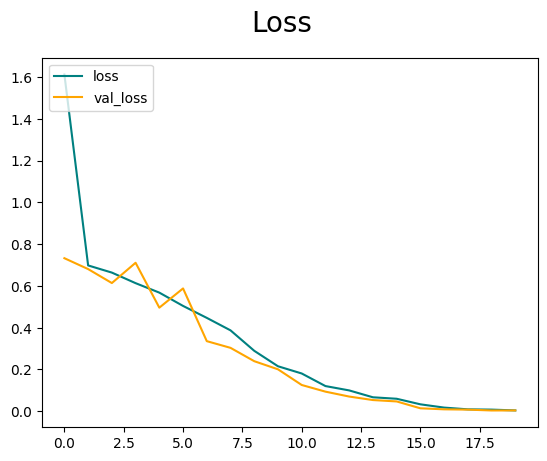

In [127]:
fig = plt.figure()
plt.plot(hist.history['loss'], color="teal", label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

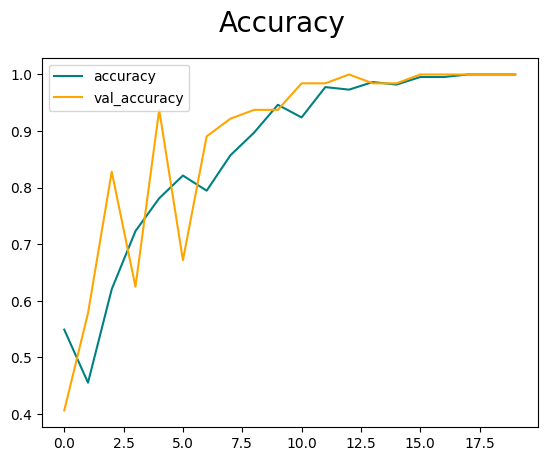

In [128]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color="teal", label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4 Evaluate Performance

### 4.1 Evaluate

In [129]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [130]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [131]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 519ms/step


In [134]:
print(f'Precision:{pre.result().numpy()}, Reecall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Reecall:1.0, Accuracy:1.0


### 4.2 Test the Data

In [154]:
import cv2

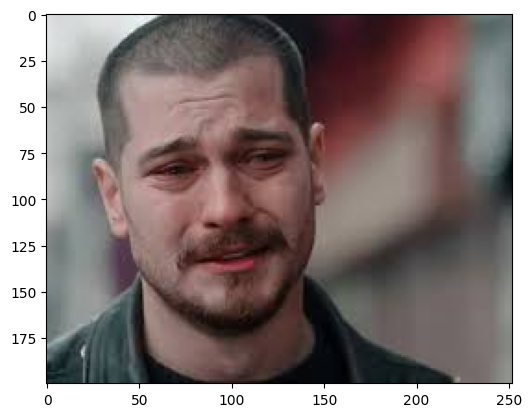

In [226]:
img = cv2.imread('sad2.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

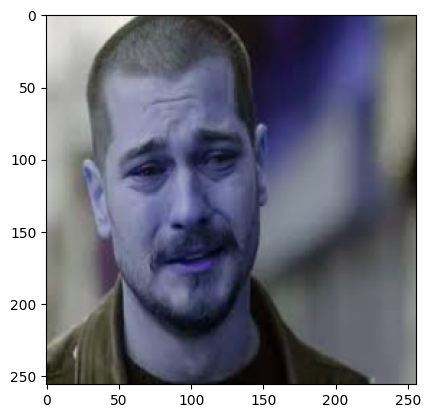

In [227]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [228]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[225.      , 224.      , 220.      ],
        [225.      , 224.      , 220.      ],
        [223.07812 , 222.07812 , 218.07812 ],
        ...,
        [117.      , 116.      , 102.      ],
        [117.      , 116.      , 102.      ],
        [117.      , 116.      , 102.      ]],

       [[225.      , 224.      , 220.      ],
        [225.      , 224.      , 220.      ],
        [223.72375 , 222.72375 , 218.72375 ],
        ...,
        [116.328125, 115.328125, 101.328125],
        [116.34387 , 115.34387 , 101.34387 ],
        [117.      , 116.      , 102.      ]],

       [[225.45312 , 224.45312 , 220.45312 ],
        [225.01062 , 224.01062 , 220.01062 ],
        [224.03906 , 223.03906 , 219.03906 ],
        ...,
        [115.564575, 114.564575, 100.564575],
        [116.01282 , 115.01282 , 101.01282 ],
        [116.546875, 115.546875, 101.546875]],

       ...,

       [[ 33.75    ,  32.75    ,  12.75    ],
        [ 41.

In [229]:
resize.shape

TensorShape([256, 256, 3])

In [230]:
np.expand_dims(resize,0)

array([[[[225.      , 224.      , 220.      ],
         [225.      , 224.      , 220.      ],
         [223.07812 , 222.07812 , 218.07812 ],
         ...,
         [117.      , 116.      , 102.      ],
         [117.      , 116.      , 102.      ],
         [117.      , 116.      , 102.      ]],

        [[225.      , 224.      , 220.      ],
         [225.      , 224.      , 220.      ],
         [223.72375 , 222.72375 , 218.72375 ],
         ...,
         [116.328125, 115.328125, 101.328125],
         [116.34387 , 115.34387 , 101.34387 ],
         [117.      , 116.      , 102.      ]],

        [[225.45312 , 224.45312 , 220.45312 ],
         [225.01062 , 224.01062 , 220.01062 ],
         [224.03906 , 223.03906 , 219.03906 ],
         ...,
         [115.564575, 114.564575, 100.564575],
         [116.01282 , 115.01282 , 101.01282 ],
         [116.546875, 115.546875, 101.546875]],

        ...,

        [[ 33.75    ,  32.75    ,  12.75    ],
         [ 41.211548,  40.211548,  20.211548]

In [231]:
np.expand_dims(resize/256,0).shape

(1, 256, 256, 3)

In [232]:
yhat = model.predict(np.expand_dims(resize/256,0))
#* Class 0 = Happy People
#* Class 1 = Sad People 

1/1 [==============================] - 0s 24ms/step


In [233]:
yhat

array([[0.35480773]], dtype=float32)

In [234]:
if yhat > 0.5 :
    print(f'predicted class is sad')
else:
    print('predicted class is happy')

predicted class is happy


# 5 Save The Model 

In [235]:
from tensorflow.keras.models import  load_model

In [236]:
model.save(os.path.join('models',"imageClassifierNewVersionLive.h5"))

In [237]:
new_model = load_model(os.path.join('models',"imageClassifierNewVersionLive.h5"))

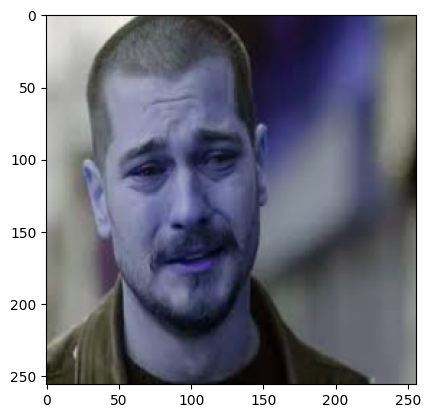

In [241]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [238]:
yhat2 = model.predict(np.expand_dims(resize/256,0))

1/1 [==============================] - 0s 18ms/step


In [239]:
yhat2

array([[0.35480773]], dtype=float32)

In [240]:
if yhat2 > 0.5 :
    print(f'predicted class is sad')
else:
    print('predicted class is happy')
    
#* Class 0 = Happy People
#* Class 1 = Sad People 

predicted class is happy
